Starting 50 iterations...
DEBUG: Cold start (1/5)...
Recorded: {'Var_A': -0.2549023437500004, 'Var_B': 0.9474456787109373}
   -> Weighted Score: -11.8109
Trial 1: {'Var_A': -0.2549023437500004, 'Var_B': 0.9474456787109373} -> Score: -11.8109 (Best: -11.8109)
DEBUG: Cold start (2/5)...
Recorded: {'Var_A': -2.3784912109375003, 'Var_B': -1.4156335449218749}
   -> Weighted Score: -43.5133
Trial 2: {'Var_A': -2.3784912109375003, 'Var_B': -1.4156335449218749} -> Score: -43.5133 (Best: -11.8109)
DEBUG: Cold start (3/5)...
Recorded: {'Var_A': 2.8424871826171874, 'Var_B': 4.8011761474609385}
   -> Weighted Score: -42.4811
Trial 3: {'Var_A': 2.8424871826171874, 'Var_B': 4.8011761474609385} -> Score: -42.4811 (Best: -11.8109)
DEBUG: Cold start (4/5)...
Recorded: {'Var_A': -4.418917083740235, 'Var_B': -2.8208438110351564}
   -> Weighted Score: -51.9084
Trial 4: {'Var_A': -4.418917083740235, 'Var_B': -2.8208438110351564} -> Score: -51.9084 (Best: -11.8109)
DEBUG: Cold start (5/5)...
Recorded: {'Var

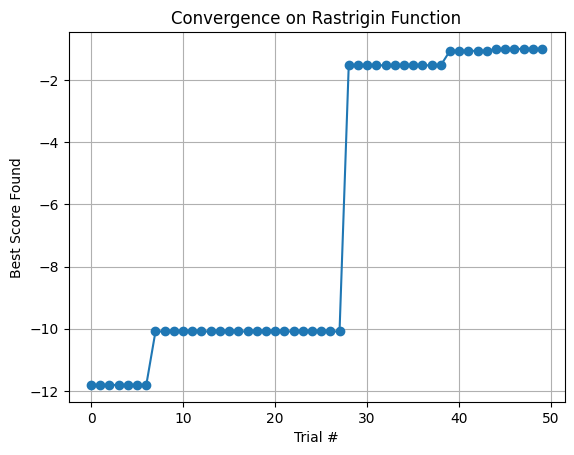

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
from food_bo import FoodOptimizer

def rastrigin(recipe):
    x = recipe['Var_A']
    y = recipe['Var_B']
    A = 10
    
    val = -(A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + 
                   (y**2 - A * np.cos(2 * np.pi * y)))
    
    return val # 

PROJECT_NAME = "test_rastrigin"

# Clean start
if os.path.exists(f"{PROJECT_NAME}.pkl"):
    os.remove(f"{PROJECT_NAME}.pkl")

opt = FoodOptimizer(PROJECT_NAME)

# Define Ingredients
opt.add_ingredient("Var_A", -5.12, 5.12)
opt.add_ingredient("Var_B", -5.12, 5.12)

# --- NEW STEP: Define the Objective ---
# The new class needs to know what "score" means
opt.add_objective("Rastrigin_Score", weight=1.0, goal='max')

N_TRIALS = 50
best_scores = []

print(f"Starting {N_TRIALS} iterations...")

for i in range(N_TRIALS):
    recipe = opt.ask()
    
    score = rastrigin(recipe)
    
    results = {"Rastrigin_Score": score}
    opt.tell(recipe, results)
    
    current_best = max(opt.Y_history)
    best_scores.append(current_best)
    
    print(f"Trial {i+1}: {recipe} -> Score: {score:.4f} (Best: {current_best:.4f})")

# --- 4. Results ---
print("\n--- FINAL RESULTS ---")
# Decode the best vector back to a recipe
best_idx = np.argmax(opt.Y_history)
best_vec = opt.X_history[best_idx] # This is the raw vector
best_recipe = opt._decode(best_vec) # Convert back to dictionary

print(f"Best Found: {best_recipe}")
print(f"Best Score: {opt.Y_history[best_idx]:.4f}")

# Plot
plt.plot(best_scores, marker='o')
plt.title("Convergence on Rastrigin Function")
plt.xlabel("Trial #")
plt.ylabel("Best Score Found")
plt.grid(True)
plt.show()

In [2]:
best_scores

[-11.810855683203682,
 -11.810855683203682,
 -11.810855683203682,
 -11.810855683203682,
 -11.810855683203682,
 -11.810855683203682,
 -11.810855683203682,
 -10.086673092842691,
 -10.086673092842691,
 -10.086673092842691,
 -10.086673092842691,
 -10.086673092842691,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.805375835454184,
 -4.067022862783765,
 -4.067022862783765,
 -4.067022862783765,
 -4.067022862783765,
 -4.067022862783765,
 -4.067022862783765,
 -4.067022862783765,
 -4.067022862783765,
 -2.459045592898292,
 -2.459045592898292,
 -2.459045592898292,
 -2.459045592898292,
 -2.459045592898292,
 -2.459045592898292,
 -2.459045592898292,
 -2.459045592898292,
 

Starting 50 iterations on 6D Hartmann Function...
Target: Find Global Max approx +3.3223

DEBUG: Cold start (1/5)...
Recorded: {'x0': 0.47510719299316406, 'x1': 0.592523992061615, 'x2': 0.4944792091846466, 'x3': 0.3138517439365387, 'x4': 0.9560918211936951, 'x5': 0.08330223709344864}
   -> Weighted Score: 0.6986
Trial 1: Score: 0.6986 (Best So Far: 0.6986)
DEBUG: Cold start (2/5)...
Recorded: {'x0': 0.26772546768188477, 'x1': 0.36175453662872314, 'x2': 0.7123444080352783, 'x3': 0.031013216823339462, 'x4': 0.5428558588027954, 'x5': 0.3926060199737549}
   -> Weighted Score: 0.5396
Trial 2: Score: 0.5396 (Best So Far: 0.6986)
DEBUG: Cold start (3/5)...
Recorded: {'x0': 0.7775866389274597, 'x1': 0.9688648581504822, 'x2': 0.01976177841424942, 'x3': 0.6400319337844849, 'x4': 0.9604793787002563, 'x5': 0.2335895597934723}
   -> Weighted Score: 0.1427
Trial 3: Score: 0.1427 (Best So Far: 0.6986)
DEBUG: Cold start (4/5)...
Recorded: {'x0': 0.06846512854099274, 'x1': 0.22452697157859802, 'x2': 0.

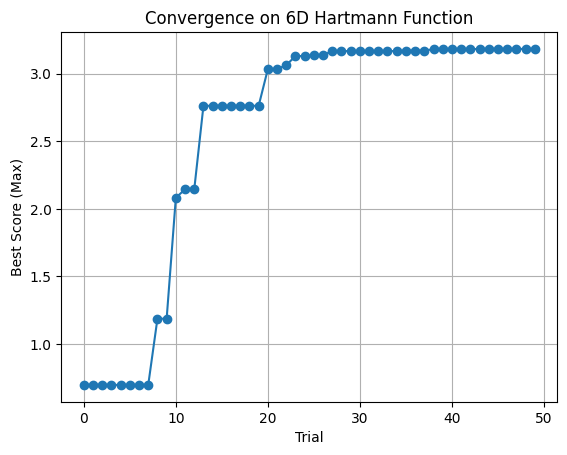

In [3]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from botorch.test_functions import Hartmann
from food_bo import FoodOptimizer

hartmann6 = Hartmann(dim=6)

def evaluate_hartmann(recipe):
    # Extract the 6 variables from the dictionary
    x = torch.tensor([
        recipe['x0'], recipe['x1'], recipe['x2'], 
        recipe['x3'], recipe['x4'], recipe['x5']
    ], dtype=torch.double).unsqueeze(0)
    
    val = -hartmann6(x).item()
    return val

PROJECT_NAME = "test_hartmann6"
if os.path.exists(f"{PROJECT_NAME}.pkl"):
    os.remove(f"{PROJECT_NAME}.pkl")

opt = FoodOptimizer(PROJECT_NAME)

for i in range(6):
    opt.add_ingredient(f"x{i}", 0.0, 1.0)

opt.add_objective("Score", weight=1.0, goal='max')

N_TRIALS = 50
best_scores = []

print(f"Starting {N_TRIALS} iterations on 6D Hartmann Function...")
print("Target: Find Global Max approx +3.3223\n")

for i in range(N_TRIALS):
    recipe = opt.ask()
    
    score = evaluate_hartmann(recipe)
    
    opt.tell(recipe, {"Score": score})
    
    current_best = max(opt.Y_history)
    best_scores.append(current_best)
    
    print(f"Trial {i+1}: Score: {score:.4f} (Best So Far: {current_best:.4f})")

best_idx = np.argmax(opt.Y_history)
print("\n--- FINAL RESULTS ---")
print(f"Best Score Found: {opt.Y_history[best_idx]:.4f}")
print(f"Target Optimal:   3.3223")

plt.plot(best_scores, marker='o')
plt.title("Convergence on 6D Hartmann Function")
plt.xlabel("Trial")
plt.ylabel("Best Score (Max)")
plt.grid(True)
plt.show()